In [15]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/content/DDOS.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # Import the pyplot module and alias it as 'plt'
import seaborn as sns
print("hello")

hello


In [17]:
df=pd.read_csv('/content/DDOS.csv')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225745 entries, 0 to 225744
Data columns (total 85 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Flow ID                       225745 non-null  object 
 1    Source IP                    225745 non-null  object 
 2    Source Port                  225745 non-null  int64  
 3    Destination IP               225745 non-null  object 
 4    Destination Port             225745 non-null  int64  
 5    Protocol                     225745 non-null  int64  
 6    Timestamp                    225745 non-null  object 
 7    Flow Duration                225745 non-null  int64  
 8    Total Fwd Packets            225745 non-null  int64  
 9    Total Backward Packets       225745 non-null  int64  
 10  Total Length of Fwd Packets   225745 non-null  int64  
 11   Total Length of Bwd Packets  225745 non-null  int64  
 12   Fwd Packet Length Max        225745 non-nul

In [19]:
# checking total null value per column
df.isnull().sum()

,0
Flow ID,0
Source IP,0
Source Port,0
Destination IP,0
Destination Port,0
...,...
Idle Mean,0
Idle Std,0
Idle Max,0
Idle Min,0


In [20]:
#checking how many type of value Label column has
df[' Label'].value_counts()

,count
Label,
DDoS,128027
BENIGN,97718


In [21]:
label_counts = df[' Label'].value_counts()
print(label_counts)

 Label
DDoS      128027
BENIGN     97718
Name: count, dtype: int64


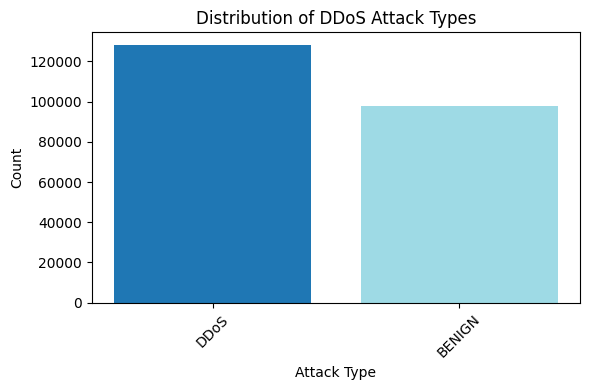

In [22]:
label_counts = df[' Label'].value_counts()

colors = plt.cm.tab20(np.linspace(0, 1, len(label_counts)))

plt.figure(figsize=(6, 4))
plt.bar(label_counts.index, label_counts.values, color=colors)
plt.title('Distribution of DDoS Attack Types')
plt.xlabel('Attack Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [24]:
#checking datatype of timeStamp
type(df[' Timestamp'][0])

str

In [25]:
df[' Timestamp'] = pd.to_datetime(df[' Timestamp'])
print(df[' Timestamp'])
df.sort_values(by=' Timestamp', inplace=True)
print(df)

0        2017-07-07 03:30:00
1        2017-07-07 03:30:00
2        2017-07-07 03:30:00
3        2017-07-07 03:30:00
4        2017-07-07 03:30:00
                 ...        
225740   2017-07-07 05:02:00
225741   2017-07-07 05:02:00
225742   2017-07-07 05:02:00
225743   2017-07-07 05:02:00
225744   2017-07-07 05:02:00
Name:  Timestamp, Length: 225745, dtype: datetime64[ns]
                                        Flow ID       Source IP   Source Port  \
0       192.168.10.5-104.16.207.165-54865-443-6  104.16.207.165           443   
1158      192.168.10.3-192.168.10.5-53-56771-17    192.168.10.5         56771   
1157      192.168.10.3-192.168.10.5-53-55057-17    192.168.10.5         55057   
1156      192.168.10.3-192.168.10.5-53-53400-17    192.168.10.5         53400   
1155      192.168.10.3-192.168.10.5-53-62896-17    192.168.10.5         62896   
...                                         ...             ...           ...   
225640   192.168.10.3-192.168.10.19-53-20516-17   192.168.

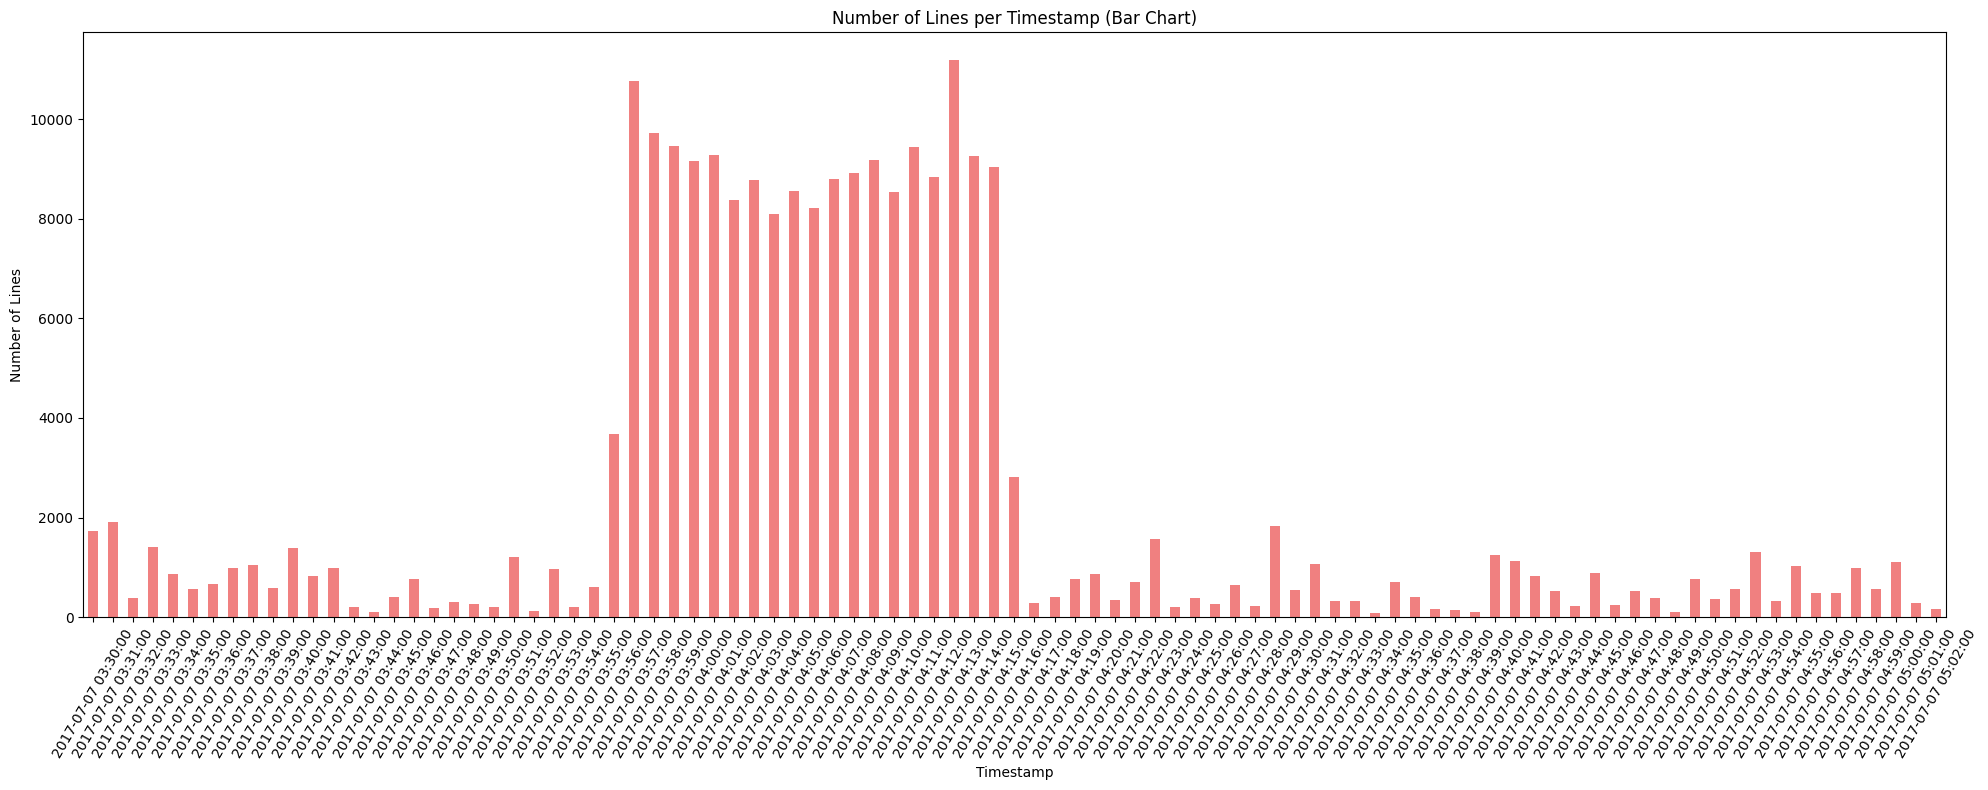

In [26]:
connection_grouped_by_time=df.groupby(' Timestamp').size()
plt.figure(figsize=(20, 8))
connection_grouped_by_time.plot(kind='bar', color='lightcoral')
plt.xlabel('Timestamp')
plt.ylabel('Number of Lines')
plt.title('Number of Lines per Timestamp (Bar Chart)')
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

In [27]:
connection_grouped_by_time

,0
Timestamp,
2017-07-07 03:30:00,1728
2017-07-07 03:31:00,1905
2017-07-07 03:32:00,386
2017-07-07 03:33:00,1402
2017-07-07 03:34:00,873
...,...
2017-07-07 04:58:00,992
2017-07-07 04:59:00,563
2017-07-07 05:00:00,1106


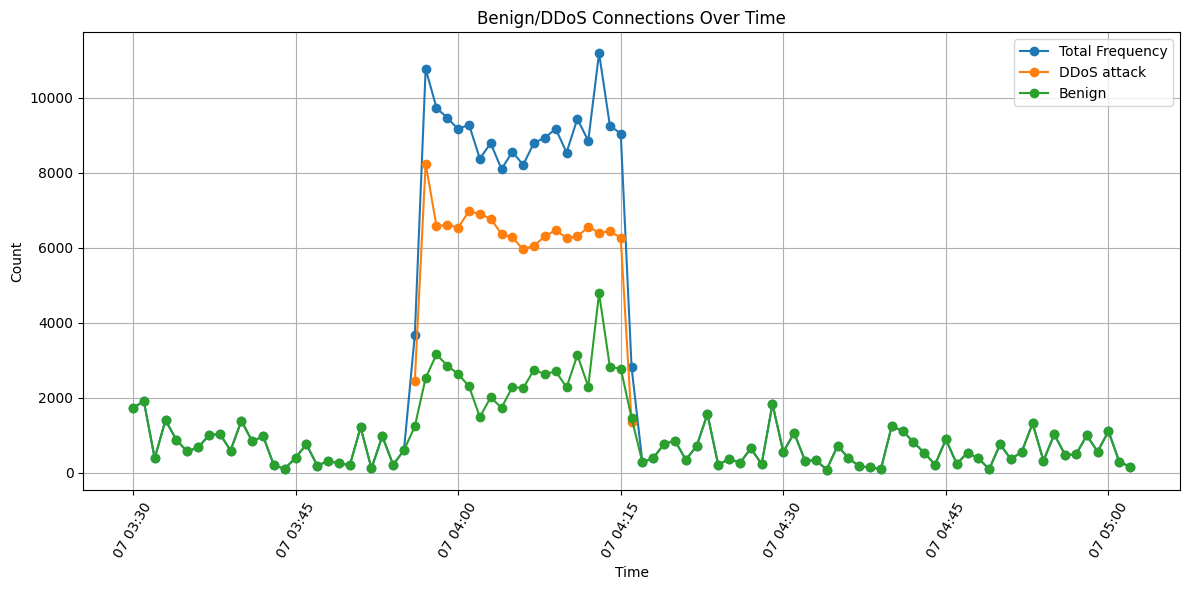

In [28]:
connection_grouped_by_time=df.groupby(' Timestamp').size()
connection_by_time_b=df[df[' Label']=='BENIGN'].groupby(' Timestamp').size()
connection_by_time_nb=df[df[' Label']!='BENIGN'].groupby(' Timestamp').size()
plt.figure(figsize=(12, 6))
plt.plot(connection_grouped_by_time.index, connection_grouped_by_time.values, marker='o', linestyle='-', label='Total Frequency')
plt.plot(connection_by_time_nb.index, connection_by_time_nb.values, marker='o', linestyle='-',label='DDoS attack')
plt.plot(connection_by_time_b.index, connection_by_time_b.values, marker='o', linestyle='-', label='Benign')
plt.title('Benign/DDoS Connections Over Time')
plt.xlabel('Time')
plt.ylabel('Count')
plt.xticks(rotation=60)
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

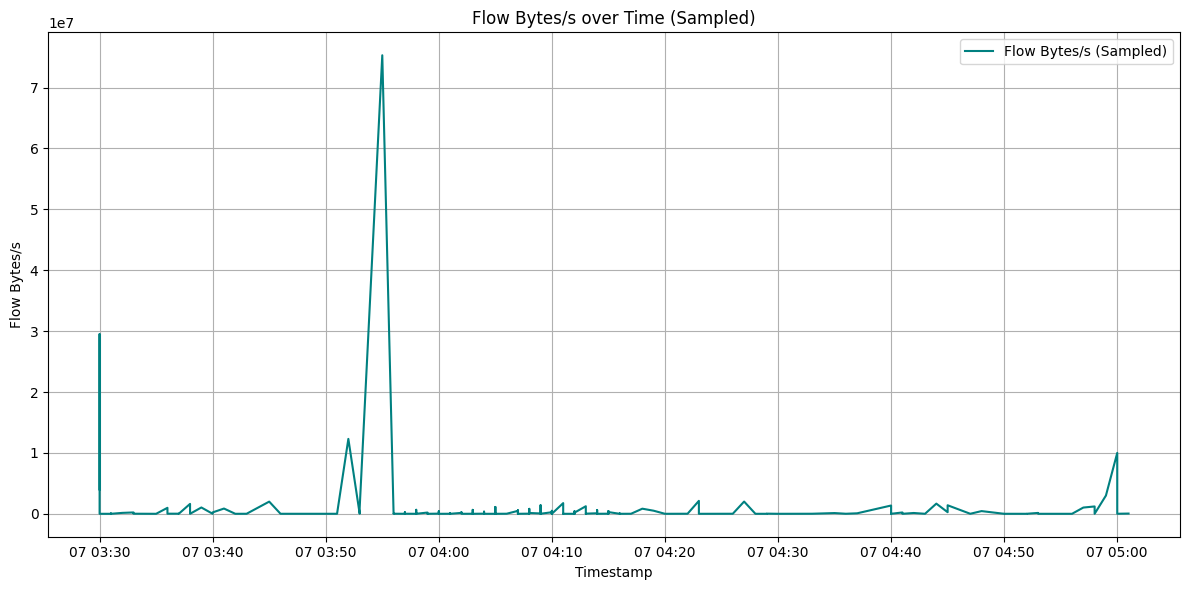

In [30]:
step = 500  # adjust based on how dense your data is
plt.figure(figsize=(12, 6))
plt.plot(df[' Timestamp'][::step], df['Flow Bytes/s'][::step], color='teal', label='Flow Bytes/s (Sampled)')
plt.title('Flow Bytes/s over Time (Sampled)')
plt.xlabel('Timestamp')
plt.ylabel('Flow Bytes/s')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

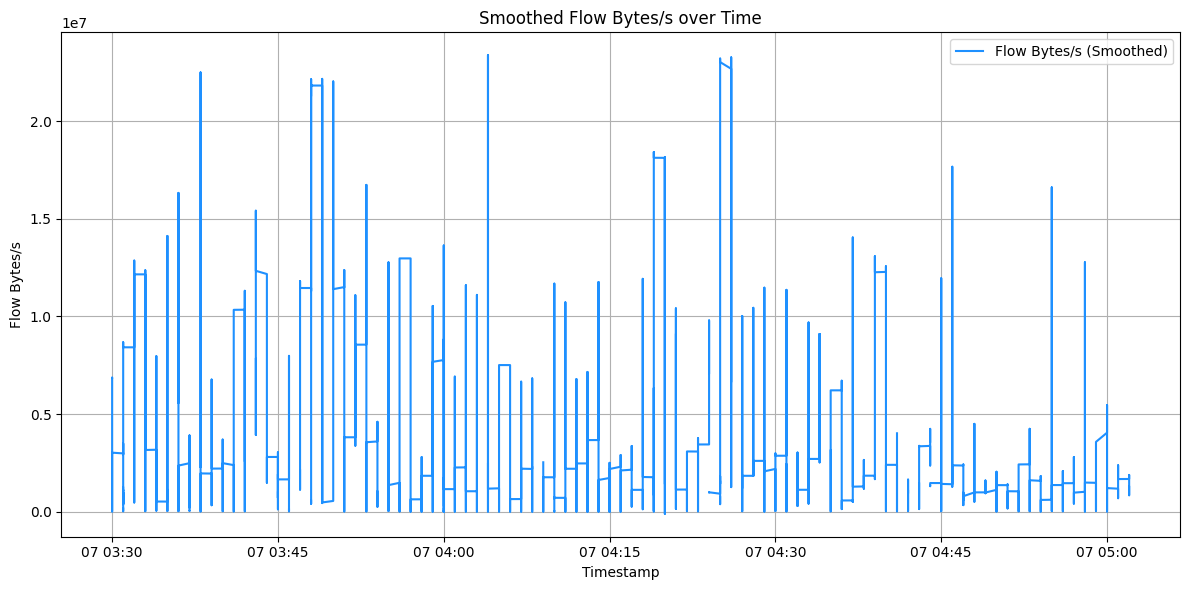

In [31]:
plt.figure(figsize=(12, 6))

# Convert Timestamp if not already
df[' Timestamp'] = pd.to_datetime(df[' Timestamp'])

# Sort by time (important!)
df = df.sort_values(' Timestamp')

# Rolling average (e.g., over 100 samples)
rolling_flow = df['Flow Bytes/s'].rolling(window=100).mean()

plt.plot(df[' Timestamp'], rolling_flow, color='dodgerblue', label='Flow Bytes/s (Smoothed)')
plt.title('Smoothed Flow Bytes/s over Time')
plt.xlabel('Timestamp')
plt.ylabel('Flow Bytes/s')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

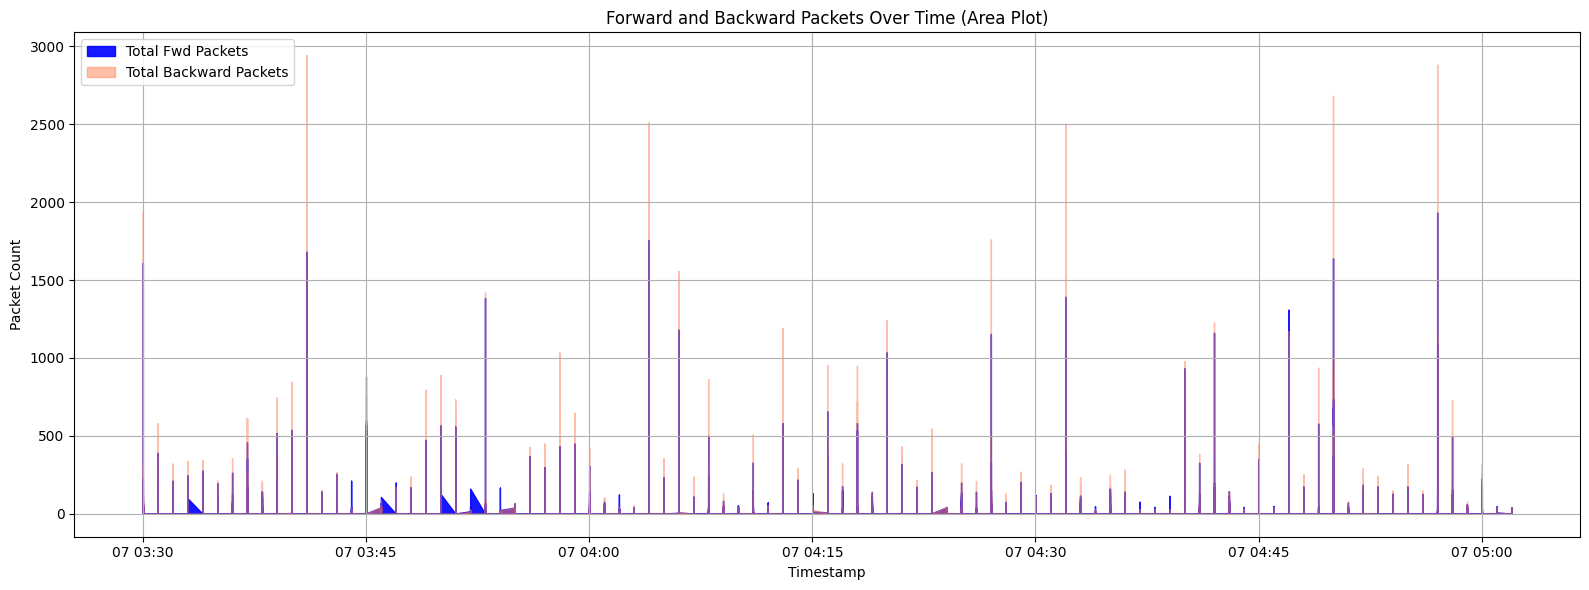

In [32]:
plt.figure(figsize=(16, 6))

plt.fill_between(df[' Timestamp'], df[' Total Fwd Packets'], color='blue', alpha = 0.9 ,label='Total Fwd Packets')
plt.fill_between(df[' Timestamp'], df[' Total Backward Packets'], color='coral',alpha = 0.5 , label='Total Backward Packets')

plt.title('Forward and Backward Packets Over Time (Area Plot)')
plt.xlabel('Timestamp')
plt.ylabel('Packet Count')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

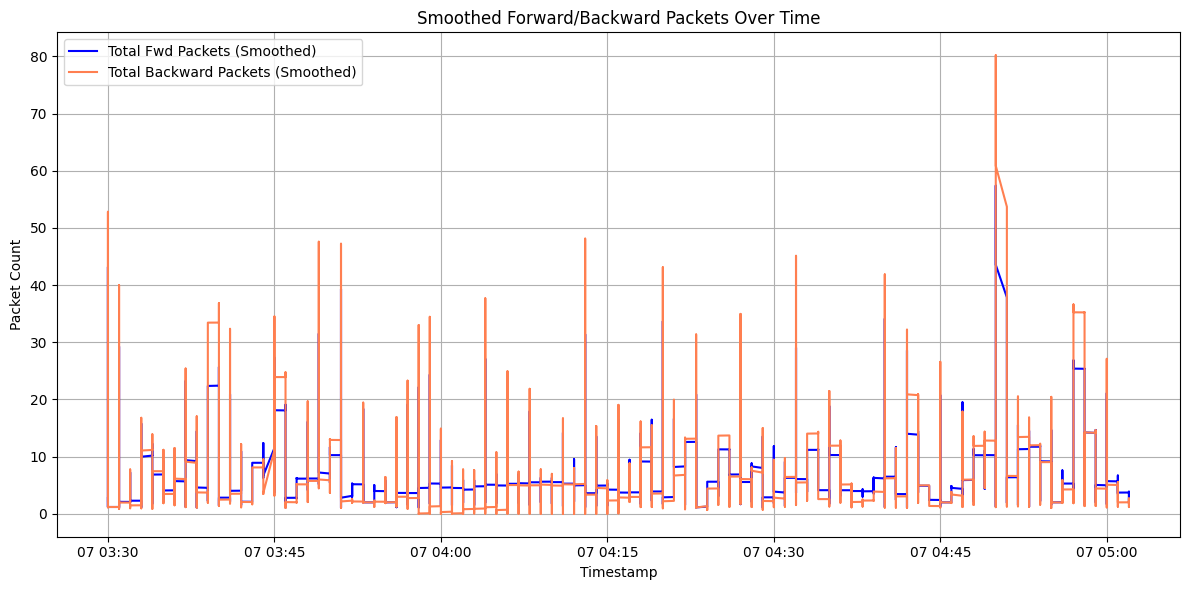

In [33]:
plt.figure(figsize=(12, 6))

# Ensure Timestamp is datetime and sorted
df[' Timestamp'] = pd.to_datetime(df[' Timestamp'])
df = df.sort_values(' Timestamp')

# Rolling average (adjust window based on data size)
window_size = 100
fwd_rolling = df[' Total Fwd Packets'].rolling(window=window_size).mean()
bwd_rolling = df[' Total Backward Packets'].rolling(window=window_size).mean()

plt.plot(df[' Timestamp'], fwd_rolling, color='blue', label='Total Fwd Packets (Smoothed)')
plt.plot(df[' Timestamp'], bwd_rolling, color='coral', label='Total Backward Packets (Smoothed)')

plt.title('Smoothed Forward/Backward Packets Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Packet Count')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [34]:
# checking the type of coulums
categorical_features = [col for col in df.columns if df[col].dtype == 'object']
categorical_features

['Flow ID', ' Source IP', ' Destination IP', ' Label']

In [35]:
# checking if column has binary data
df.columns[df.nunique()==2]

Index(['Fwd PSH Flags', 'FIN Flag Count', ' SYN Flag Count', ' RST Flag Count',
       ' PSH Flag Count', ' ACK Flag Count', ' URG Flag Count',
       ' ECE Flag Count', ' Label'],
      dtype='object')

In [36]:
# creating new dataframe of binary columns
binary_columns=df.columns[df.nunique()==2].tolist()
binary_columns

['Fwd PSH Flags',
 'FIN Flag Count',
 ' SYN Flag Count',
 ' RST Flag Count',
 ' PSH Flag Count',
 ' ACK Flag Count',
 ' URG Flag Count',
 ' ECE Flag Count',
 ' Label']

<ipython-input-37-eb87913199fb>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, ax=ax[i], palette='Set2')
<ipython-input-37-eb87913199fb>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, ax=ax[i], palette='Set2')
<ipython-input-37-eb87913199fb>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, ax=ax[i], palette='Set2')
<ipython-input-37-eb87913199fb>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable

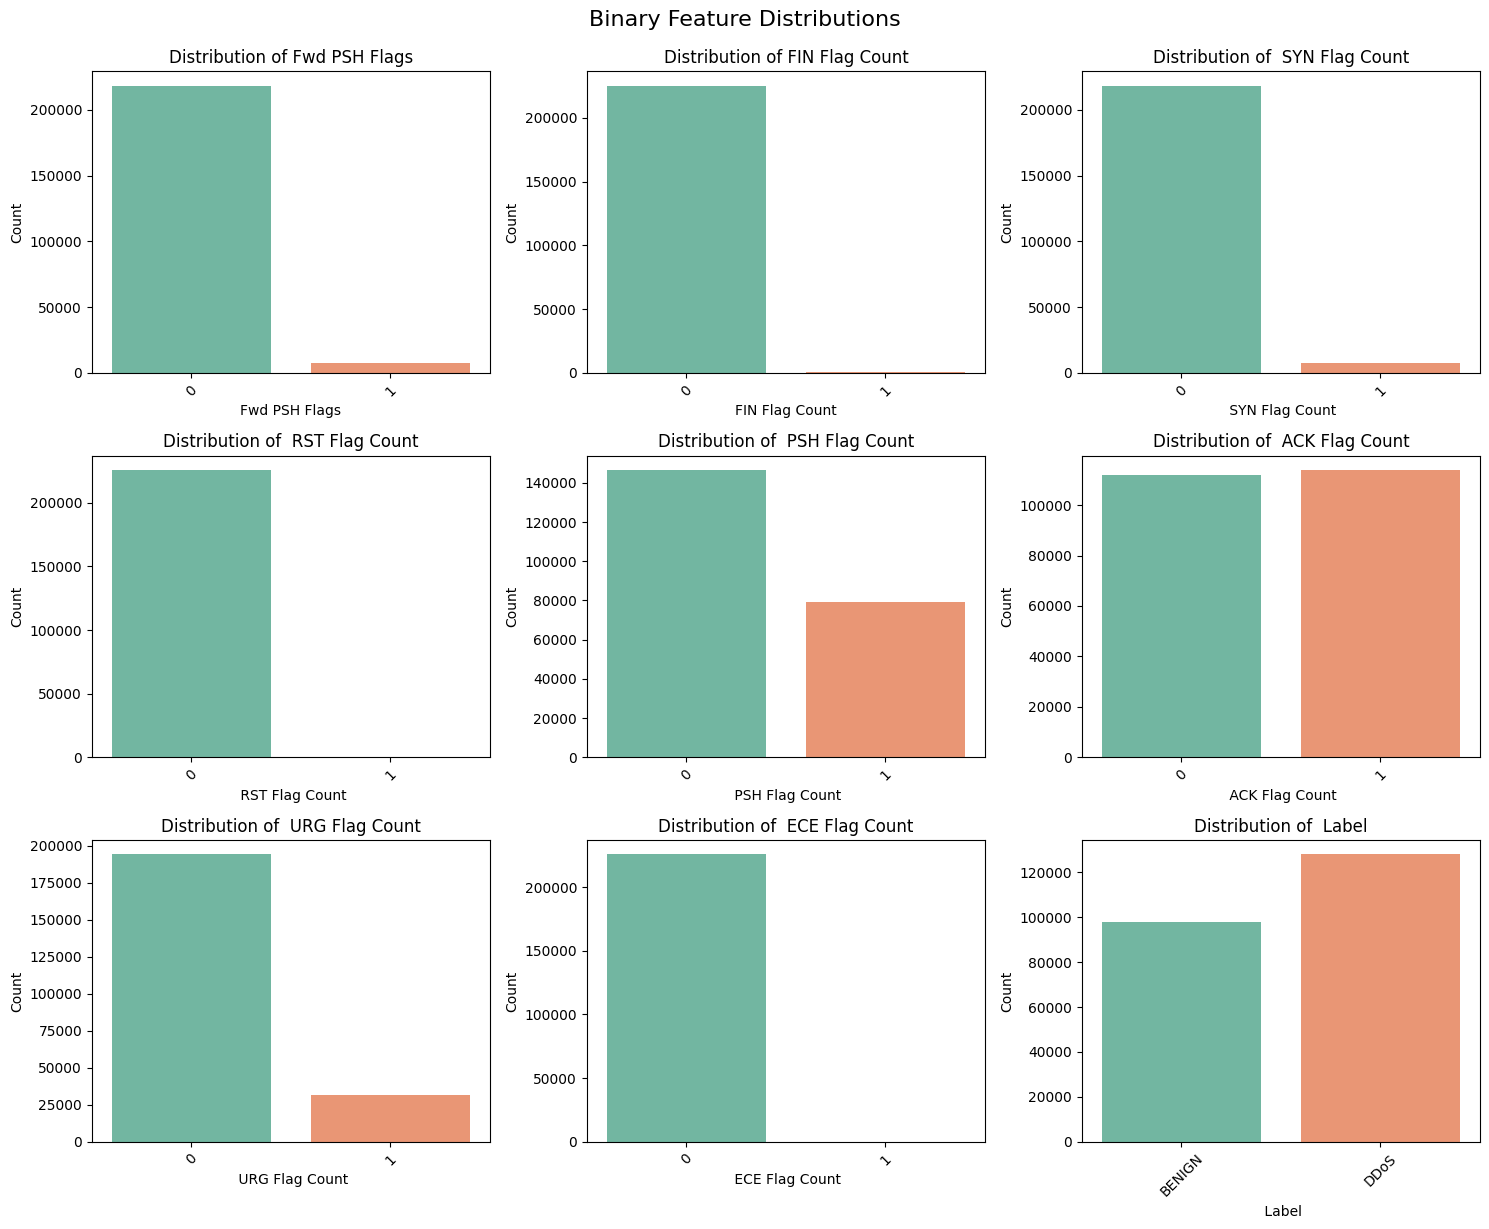

In [37]:
fig, ax = plt.subplots(3, 3, figsize=(15, 12))  # larger for better spacing
ax = ax.flatten()

for i, column in enumerate(binary_columns):
    sns.countplot(data=df, x=column, ax=ax[i], palette='Set2')
    ax[i].set_title(f'Distribution of {column}', fontsize=12)
    ax[i].set_xlabel(column, fontsize=10)
    ax[i].set_ylabel('Count', fontsize=10)
    ax[i].tick_params(axis='x', rotation=45)

# Hide any unused subplots if len(binary_columns) < 9
for j in range(len(binary_columns), len(ax)):
    fig.delaxes(ax[j])

plt.tight_layout()
plt.suptitle('Binary Feature Distributions', fontsize=16, y=1.02)
plt.show()

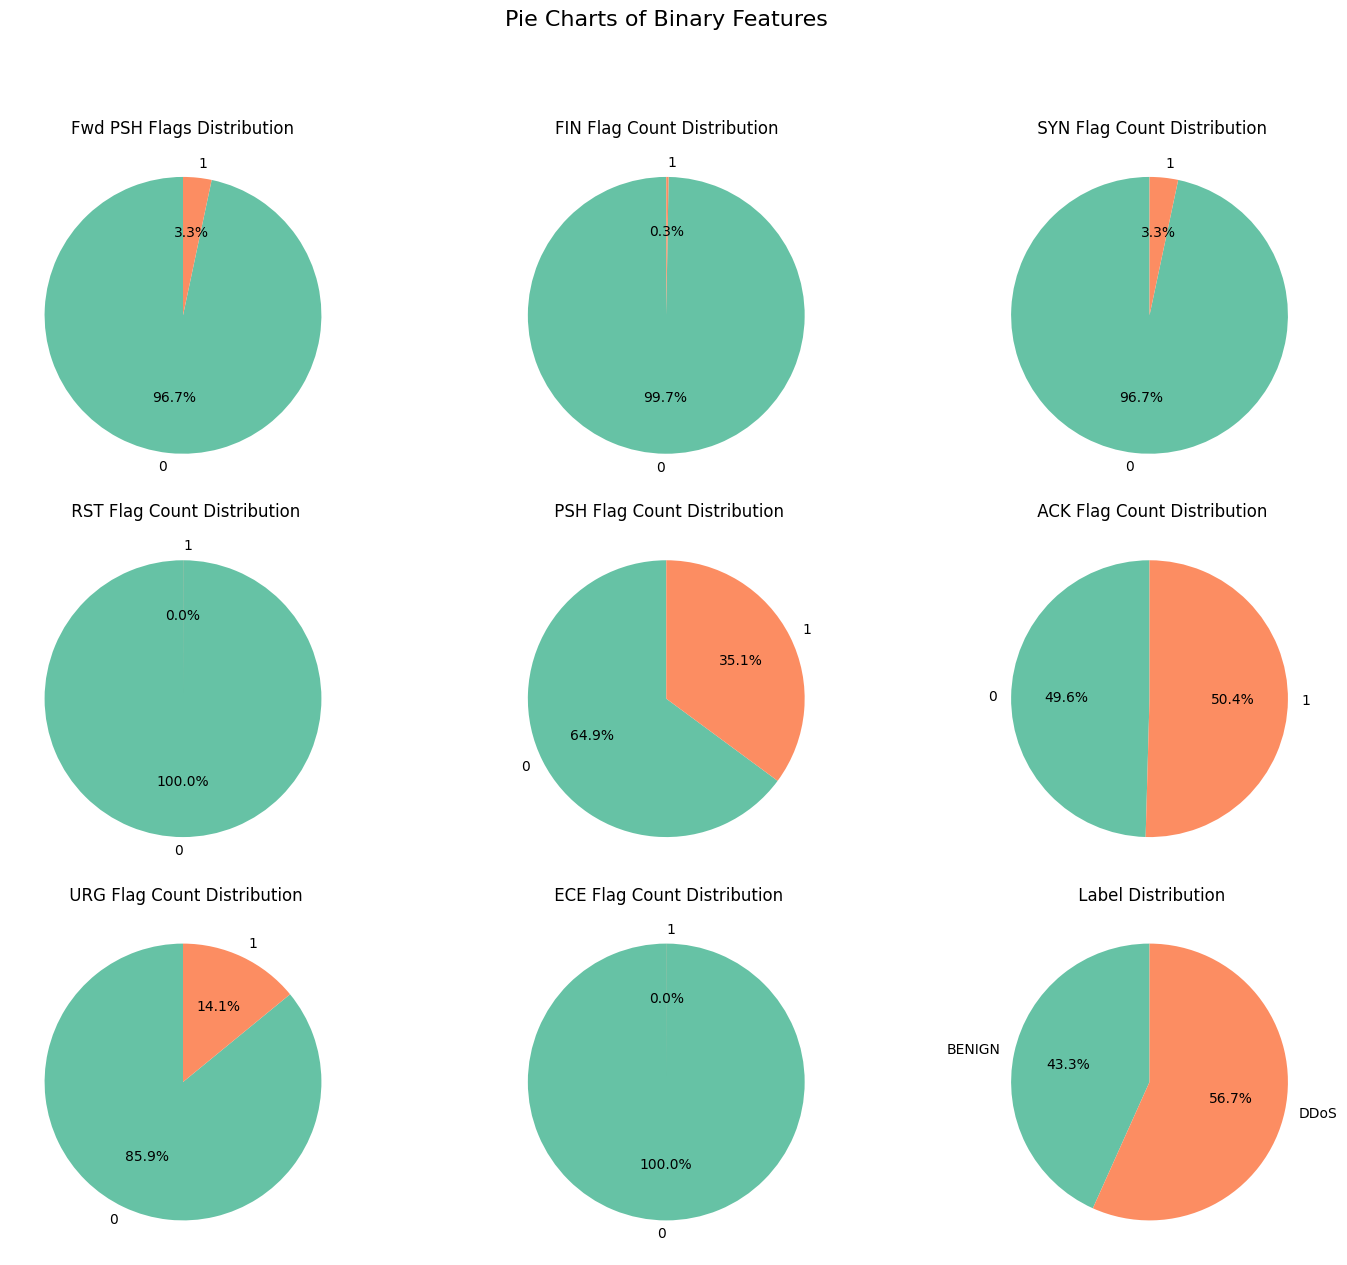

In [38]:
fig, ax = plt.subplots(3, 3, figsize=(15, 12))
ax = ax.flatten()

for i, column in enumerate(binary_columns):
    # Create a crosstab for counts grouped by the binary column and Label
    counts = pd.crosstab(df[column], df[' Label'])

    # Pie plots for each binary feature
    counts.sum(axis=1).plot.pie(
        labels=counts.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=sns.color_palette("Set2"),
        ax=ax[i]
    )
    ax[i].set_ylabel('')
    ax[i].set_title(f'{column} Distribution')

# Hide extra axes if binary_columns < 9
for j in range(len(binary_columns), len(ax)):
    fig.delaxes(ax[j])

plt.suptitle('Pie Charts of Binary Features', fontsize=16, y=1.05)
plt.tight_layout()
plt.show()

In [39]:
df.nunique()

,0
Flow ID,86421
Source IP,2067
Source Port,50697
Destination IP,2554
Destination Port,23950
...,...
Idle Mean,35285
Idle Std,5857
Idle Max,33002
Idle Min,48018


In [40]:
df[' Protocol'].value_counts()

,count
Protocol,
6,192820
17,32871
0,54


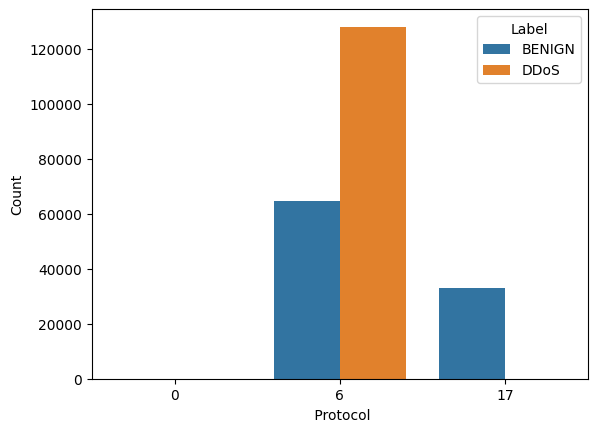

In [41]:
sns.countplot(data=df, x=' Protocol', hue=' Label')
plt.xlabel(' Protocol')
plt.ylabel('Count')
plt.legend(title='Label')

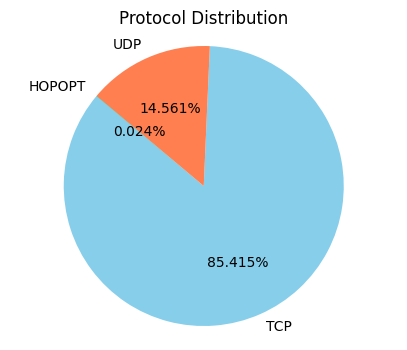

In [42]:
protocol_counts=df[' Protocol'].value_counts()
protocol_names={
    6: 'TCP', 17: 'UDP', 0: 'HOPOPT'
}
protocol_counts.index = protocol_counts.index.map(protocol_names)
plt.figure(figsize=(5, 4))
protocol_counts.plot(kind='pie', autopct='%1.3f%%', startangle=140, colors=['skyblue', 'coral', 'green'])
plt.title('Protocol Distribution')
plt.ylabel('')
plt.axis('equal')
plt.show()

In [43]:
discrete_vars_non_binary = [col for col in df.columns if df[col].dtype == 'int64' and col not in binary_columns]
continuous_vars = [col for col in df.columns if df[col].dtype == 'float64']

In [44]:
discrete_vars_non_binary

[' Source Port',
 ' Destination Port',
 ' Protocol',
 ' Flow Duration',
 ' Total Fwd Packets',
 ' Total Backward Packets',
 'Total Length of Fwd Packets',
 ' Total Length of Bwd Packets',
 ' Fwd Packet Length Max',
 ' Fwd Packet Length Min',
 'Bwd Packet Length Max',
 ' Bwd Packet Length Min',
 ' Flow IAT Max',
 ' Flow IAT Min',
 'Fwd IAT Total',
 ' Fwd IAT Max',
 ' Fwd IAT Min',
 'Bwd IAT Total',
 ' Bwd IAT Max',
 ' Bwd IAT Min',
 ' Bwd PSH Flags',
 ' Fwd URG Flags',
 ' Bwd URG Flags',
 ' Fwd Header Length',
 ' Bwd Header Length',
 ' Min Packet Length',
 ' Max Packet Length',
 ' CWE Flag Count',
 ' Down/Up Ratio',
 ' Fwd Header Length.1',
 'Fwd Avg Bytes/Bulk',
 ' Fwd Avg Packets/Bulk',
 ' Fwd Avg Bulk Rate',
 ' Bwd Avg Bytes/Bulk',
 ' Bwd Avg Packets/Bulk',
 'Bwd Avg Bulk Rate',
 'Subflow Fwd Packets',
 ' Subflow Fwd Bytes',
 ' Subflow Bwd Packets',
 ' Subflow Bwd Bytes',
 'Init_Win_bytes_forward',
 ' Init_Win_bytes_backward',
 ' act_data_pkt_fwd',
 ' min_seg_size_forward',
 ' Active

In [45]:
df[[ 'Flow ID',' Destination IP',' Source IP', ' Destination Port',' Source Port',' Protocol',]]

,Flow ID,Destination IP,Source IP,Destination Port,Source Port,Protocol
0,192.168.10.5-104.16.207.165-54865-443-6,192.168.10.5,104.16.207.165,54865,443,6
864,192.168.10.3-192.168.10.5-53-62442-17,192.168.10.3,192.168.10.5,53,62442,17
1158,192.168.10.3-192.168.10.5-53-56771-17,192.168.10.3,192.168.10.5,53,56771,17
1157,192.168.10.3-192.168.10.5-53-55057-17,192.168.10.3,192.168.10.5,53,55057,17
1156,192.168.10.3-192.168.10.5-53-53400-17,192.168.10.3,192.168.10.5,53,53400,17
...,...,...,...,...,...,...
225642,192.168.10.3-192.168.10.19-53-48588-17,192.168.10.3,192.168.10.19,53,48588,17
225606,172.217.11.34-192.168.10.15-80-61282-6,192.168.10.15,172.217.11.34,61282,80,6
225635,192.168.10.17-192.168.10.50-37759-22-6,192.168.10.50,192.168.10.17,22,37759,6
225687,192.168.10.19-192.168.10.50-137-137-17,192.168.10.19,192.168.10.50,137,137,17


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1[' Destination Port'].plot(kind='hist', bins=20, title=' Destination Port')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2[' Source Port'].plot(kind='hist', bins=20, title=' Source Port')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3[' Protocol'].plot(kind='hist', bins=20, title=' Protocol')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='index', y=' Destination Port', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x=' Destination Port', y=' Source Port', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x=' Source Port', y=' Protocol', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_8[' Destination Port'].plot(kind='line', figsize=(8, 4), title=' Destination Port')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9[' Source Port'].plot(kind='line', figsize=(8, 4), title=' Source Port')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10[' Protocol'].plot(kind='line', figsize=(8, 4), title=' Protocol')
plt.gca().spines[['top', 'right']].set_visible(False)

In [47]:
# creating a dict of duplicate columns

identicals = {}

In [48]:
for col in df.columns:
    l = []
    for col1 in df.columns:
        if col != col1 and df[col].equals(df[col1]):
            print(f"{col} and {col1} are identical")
            l.append(col1)
    if len(l)>0:
        print(l)
        identicals[col] = l

 Total Fwd Packets and Subflow Fwd Packets are identical
['Subflow Fwd Packets']
 Total Backward Packets and  Subflow Bwd Packets are identical
[' Subflow Bwd Packets']
Total Length of Fwd Packets and  Subflow Fwd Bytes are identical
[' Subflow Fwd Bytes']
 Total Length of Bwd Packets and  Subflow Bwd Bytes are identical
[' Subflow Bwd Bytes']
 Fwd Packet Length Mean and  Avg Fwd Segment Size are identical
[' Avg Fwd Segment Size']
Fwd PSH Flags and  SYN Flag Count are identical
[' SYN Flag Count']
 Bwd PSH Flags and  Fwd URG Flags are identical
 Bwd PSH Flags and  Bwd URG Flags are identical
 Bwd PSH Flags and  CWE Flag Count are identical
 Bwd PSH Flags and Fwd Avg Bytes/Bulk are identical
 Bwd PSH Flags and  Fwd Avg Packets/Bulk are identical
 Bwd PSH Flags and  Fwd Avg Bulk Rate are identical
 Bwd PSH Flags and  Bwd Avg Bytes/Bulk are identical
 Bwd PSH Flags and  Bwd Avg Packets/Bulk are identical
 Bwd PSH Flags and Bwd Avg Bulk Rate are identical
[' Fwd URG Flags', ' Bwd URG Flag

In [49]:
for i in identicals:
    print(i ," : ", identicals.get(i))

 Total Fwd Packets  :  ['Subflow Fwd Packets']
 Total Backward Packets  :  [' Subflow Bwd Packets']
Total Length of Fwd Packets  :  [' Subflow Fwd Bytes']
 Total Length of Bwd Packets  :  [' Subflow Bwd Bytes']
 Fwd Packet Length Mean  :  [' Avg Fwd Segment Size']
Fwd PSH Flags  :  [' SYN Flag Count']
 Bwd PSH Flags  :  [' Fwd URG Flags', ' Bwd URG Flags', ' CWE Flag Count', 'Fwd Avg Bytes/Bulk', ' Fwd Avg Packets/Bulk', ' Fwd Avg Bulk Rate', ' Bwd Avg Bytes/Bulk', ' Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate']
 Fwd URG Flags  :  [' Bwd PSH Flags', ' Bwd URG Flags', ' CWE Flag Count', 'Fwd Avg Bytes/Bulk', ' Fwd Avg Packets/Bulk', ' Fwd Avg Bulk Rate', ' Bwd Avg Bytes/Bulk', ' Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate']
 Bwd URG Flags  :  [' Bwd PSH Flags', ' Fwd URG Flags', ' CWE Flag Count', 'Fwd Avg Bytes/Bulk', ' Fwd Avg Packets/Bulk', ' Fwd Avg Bulk Rate', ' Bwd Avg Bytes/Bulk', ' Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate']
 Fwd Header Length  :  [' Fwd Header Length.1']
 SYN Flag 

In [50]:
len(identicals)

26

In [51]:
column_list = identicals.keys()
column_list = list(column_list)
column_list

[' Total Fwd Packets',
 ' Total Backward Packets',
 'Total Length of Fwd Packets',
 ' Total Length of Bwd Packets',
 ' Fwd Packet Length Mean',
 'Fwd PSH Flags',
 ' Bwd PSH Flags',
 ' Fwd URG Flags',
 ' Bwd URG Flags',
 ' Fwd Header Length',
 ' SYN Flag Count',
 ' RST Flag Count',
 ' CWE Flag Count',
 ' ECE Flag Count',
 ' Avg Fwd Segment Size',
 ' Fwd Header Length.1',
 'Fwd Avg Bytes/Bulk',
 ' Fwd Avg Packets/Bulk',
 ' Fwd Avg Bulk Rate',
 ' Bwd Avg Bytes/Bulk',
 ' Bwd Avg Packets/Bulk',
 'Bwd Avg Bulk Rate',
 'Subflow Fwd Packets',
 ' Subflow Fwd Bytes',
 ' Subflow Bwd Packets',
 ' Subflow Bwd Bytes']

In [52]:
df[column_list]

,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Mean,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,...,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes
0,2,0,12,0,6.000000,0,0,0,0,40,...,0,0,0,0,0,0,2,12,0,0
864,2,2,64,160,32.000000,0,0,0,0,64,...,0,0,0,0,0,0,2,64,2,160
1158,4,2,152,190,38.000000,0,0,0,0,80,...,0,0,0,0,0,0,4,152,2,190
1157,4,2,176,344,44.000000,0,0,0,0,80,...,0,0,0,0,0,0,4,176,2,344
1156,2,2,82,114,41.000000,0,0,0,0,40,...,0,0,0,0,0,0,2,82,2,114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225642,2,2,70,102,35.000000,0,0,0,0,64,...,0,0,0,0,0,0,2,70,2,102
225606,1,1,6,6,6.000000,0,0,0,0,20,...,0,0,0,0,0,0,1,6,1,6
225635,41,42,2728,6634,66.536585,0,0,0,0,1328,...,0,0,0,0,0,0,41,2728,42,6634
225687,2,0,124,0,62.000000,0,0,0,0,64,...,0,0,0,0,0,0,2,124,0,0


In [53]:
duplicates_list = [j for i in identicals for j in identicals[i] ]

In [54]:
len(duplicates_list)

106

In [55]:
duplicates_list = list(set(duplicates_list))
len(duplicates_list)

26

In [56]:
# removing all column have same values
remove_colums = []
for i, col in enumerate(duplicates_list):
    for j, col1 in enumerate(duplicates_list):
        if col != col1 and df[col].equals(df[col1]):
            remove_colums.append(col1)
            duplicates_list[j] = col
duplicates_list = list(set(duplicates_list))

In [57]:
print(len(remove_colums))
print(len(duplicates_list))

17
9


In [58]:
df.drop(remove_colums,axis=1,inplace=True)

removing columns with constant value

In [59]:
constant_columns=df.columns[df.nunique()==1]
constant_columns
print(len(constant_columns))

for column in constant_columns:
  print(f'The colonne {column} takes only one value:\n {df[column].value_counts()}\n')

1
The colonne  Fwd Avg Packets/Bulk takes only one value:
  Fwd Avg Packets/Bulk
0    225745
Name: count, dtype: int64



In [60]:
df.drop(columns=constant_columns,inplace=True)

Label encoding for categorical features:

In [61]:
# creating DL model for classification
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, BatchNormalization
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
import os

In [62]:
# creating object of Label Encoder
label_encoder=LabelEncoder()

In [63]:
# converting BEGIN and DDOS into 0 and 1 with fit_transform fit for model to learn transcom to convert lebel into binaries
df[' Label']=label_encoder.fit_transform(df[' Label'])

In [64]:
df[' Label'].unique()

array([0, 1])

In [65]:
# creating list of all binaries and fit the model then convert it to numerical values
all_ip=pd.concat([df[' Source IP'],df[' Destination IP']])
label_encoder.fit(all_ip)
df[' Source IP']=label_encoder.transform(df[' Source IP'])
df[' Destination IP']=label_encoder.transform(df[' Destination IP'])

In [66]:
df.head()

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,192.168.10.5-104.16.207.165-54865-443-6,24,443,871,54865,6,2017-07-07 03:30:00,3,2,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
864,192.168.10.3-192.168.10.5-53-62442-17,871,62442,870,53,17,2017-07-07 03:30:00,23530,2,2,...,32,0.0,0.0,0,0,0.0,0.0,0,0,0
1158,192.168.10.3-192.168.10.5-53-56771-17,871,56771,870,53,17,2017-07-07 03:30:00,59362,4,2,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
1157,192.168.10.3-192.168.10.5-53-55057-17,871,55057,870,53,17,2017-07-07 03:30:00,61344,4,2,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
1156,192.168.10.3-192.168.10.5-53-53400-17,871,53400,870,53,17,2017-07-07 03:30:00,238,2,2,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0


In [67]:
# droping the flow id
df.drop(['Flow ID'],axis=1,inplace=True)

In [ ]:
df.corr()

,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
Source IP,1.000000,-0.364323,-0.010057,0.454587,0.298156,0.122868,-0.040601,0.020113,0.210231,0.123614,...,0.289566,-0.022408,0.079552,0.013414,-0.037990,-0.084251,-0.067886,-0.090827,-0.062509,-0.752707
Source Port,-0.364323,1.000000,0.292387,-0.727093,0.193702,0.045245,0.066677,0.046492,-0.415225,-0.183577,...,0.051752,0.035426,0.015362,0.037363,0.034631,0.051217,0.040340,0.055066,0.037903,0.388721
Destination IP,-0.010057,0.292387,1.000000,-0.374056,0.003325,0.068110,-0.045646,0.054167,-0.242487,-0.129450,...,0.166936,-0.036924,0.081243,0.006315,-0.050291,-0.111537,-0.082802,-0.118200,-0.085869,0.019534
Destination Port,0.454587,-0.727093,-0.374056,1.000000,-0.183045,0.017646,0.107038,-0.044270,0.604586,0.207158,...,-0.074278,0.061313,-0.026592,0.043156,0.066356,0.132272,0.110687,0.144428,0.095687,-0.509798
Protocol,0.298156,0.193702,0.003325,-0.183045,1.000000,0.092528,-0.194691,-0.077461,-0.109536,0.038159,...,0.474116,-0.096252,-0.033096,-0.099233,-0.092237,-0.169636,-0.116058,-0.176677,-0.133858,-0.471904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Idle Mean,-0.084251,0.051217,-0.111537,0.132272,-0.169636,-0.041900,0.871855,0.110787,0.272060,-0.039715,...,-0.139772,0.595859,0.022025,0.531538,0.602021,1.000000,0.420170,0.952585,0.910822,0.087114
Idle Std,-0.067886,0.040340,-0.082802,0.110687,-0.116058,-0.032623,0.630604,0.056807,0.230387,-0.048230,...,-0.099363,-0.057820,-0.003866,-0.055222,-0.058847,0.420170,1.000000,0.676276,0.008218,0.078023
Idle Max,-0.090827,0.055066,-0.118200,0.144428,-0.176677,-0.044958,0.919199,0.109429,0.298035,-0.048410,...,-0.146873,0.464725,0.017842,0.413812,0.469089,0.952585,0.676276,1.000000,0.742109,0.096775
Idle Min,-0.062509,0.037903,-0.085869,0.095687,-0.133858,-0.031609,0.672003,0.094747,0.194918,-0.021718,...,-0.109090,0.682722,0.024496,0.609839,0.690201,0.910822,0.008218,0.742109,1.000000,0.061243


In [68]:
correlation_matrix = df.corr()

In [69]:
highly_correlated = correlation_matrix.abs() > 0.9
highly_correlated

,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Bwd Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
Source IP,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Source Port,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Destination IP,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Destination Port,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Protocol,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Idle Mean,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,True,False
Idle Std,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
Idle Max,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,True,False,True,False,False
Idle Min,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False


In [70]:
correlated_features = [(feature1, feature2) for feature1 in correlation_matrix.columns
                       for feature2 in correlation_matrix.columns
                       if highly_correlated.loc[feature1, feature2] and feature1 != feature2]

In [71]:
printed_pairs = set()
for feature1, feature2 in correlated_features:
    if (feature2, feature1) not in printed_pairs:  # Check if the pair has already been printed
        print(f"{feature1} and {feature2} are highly correlated: {correlation_matrix.loc[feature1, feature2]}")
        printed_pairs.add((feature1, feature2))

 Flow Duration and  Flow IAT Max are highly correlated: 0.920257264115308
 Flow Duration and Fwd IAT Total are highly correlated: 0.9970539718291891
 Flow Duration and  Fwd IAT Max are highly correlated: 0.9179458157781374
 Flow Duration and  Idle Max are highly correlated: 0.9191990945209572
 Total Fwd Packets and  Total Backward Packets are highly correlated: 0.9567137090959801
 Total Fwd Packets and  Total Length of Bwd Packets are highly correlated: 0.9384698040257127
 Total Fwd Packets and  Fwd Header Length are highly correlated: 0.9684337767327466
 Total Fwd Packets and  Bwd Header Length are highly correlated: 0.9287367502694462
 Total Backward Packets and  Total Length of Bwd Packets are highly correlated: 0.9704220020372498
 Total Backward Packets and  Fwd Header Length are highly correlated: 0.9395878609688934
 Total Backward Packets and  Bwd Header Length are highly correlated: 0.9755921670590133
 Total Length of Bwd Packets and  Fwd Header Length are highly correlated: 0.9

In [72]:
corr_filter = {}
for key , value in correlated_features:
    if key not in corr_filter:
        l = [value]
        corr_filter.update({key : l })
    else:
        l = corr_filter[key]
        l.append(value)
        corr_filter.update({key : l })

In [73]:
corr_filter

{' Flow Duration': [' Flow IAT Max',
  'Fwd IAT Total',
  ' Fwd IAT Max',
  ' Idle Max'],
 ' Total Fwd Packets': [' Total Backward Packets',
  ' Total Length of Bwd Packets',
  ' Fwd Header Length',
  ' Bwd Header Length'],
 ' Total Backward Packets': [' Total Fwd Packets',
  ' Total Length of Bwd Packets',
  ' Fwd Header Length',
  ' Bwd Header Length'],
 ' Total Length of Bwd Packets': [' Total Fwd Packets',
  ' Total Backward Packets',
  ' Fwd Header Length',
  ' Bwd Header Length'],
 ' Fwd Packet Length Max': [' Fwd Packet Length Std', ' Avg Fwd Segment Size'],
 ' Fwd Packet Length Std': [' Fwd Packet Length Max', ' Avg Fwd Segment Size'],
 'Bwd Packet Length Max': [' Bwd Packet Length Mean',
  ' Bwd Packet Length Std',
  ' Avg Bwd Segment Size'],
 ' Bwd Packet Length Mean': ['Bwd Packet Length Max',
  ' Bwd Packet Length Std',
  ' Avg Bwd Segment Size'],
 ' Bwd Packet Length Std': ['Bwd Packet Length Max',
  ' Bwd Packet Length Mean',
  ' Avg Bwd Segment Size'],
 ' Flow Packets/s'

In [74]:
corr_filter2 = corr_filter.copy()
removed = set()

for i in corr_filter:
    if i not in removed:
        for j in corr_filter[i]:
            removed.add(j)
            corr_filter2.pop(j, None)

In [75]:
len(corr_filter2)

12

In [76]:
items = corr_filter2.keys()
items = list(items)
items

[' Flow Duration',
 ' Total Fwd Packets',
 ' Fwd Packet Length Max',
 'Bwd Packet Length Max',
 ' Flow Packets/s',
 ' Flow IAT Mean',
 ' Fwd IAT Std',
 ' Fwd IAT Min',
 ' Bwd IAT Std',
 ' Max Packet Length',
 'Active Mean',
 ' Idle Min']

In [77]:
for i in items:
    corr_filter.pop(i)

In [78]:
corr_filter = list(corr_filter.keys())

In [79]:
corr_filter

[' Total Backward Packets',
 ' Total Length of Bwd Packets',
 ' Fwd Packet Length Std',
 ' Bwd Packet Length Mean',
 ' Bwd Packet Length Std',
 ' Flow IAT Std',
 ' Flow IAT Max',
 'Fwd IAT Total',
 ' Fwd IAT Mean',
 ' Fwd IAT Max',
 ' Bwd IAT Max',
 ' Bwd IAT Min',
 ' Fwd Header Length',
 ' Bwd Header Length',
 'Fwd Packets/s',
 ' Packet Length Mean',
 ' Packet Length Std',
 ' Packet Length Variance',
 ' Average Packet Size',
 ' Avg Fwd Segment Size',
 ' Avg Bwd Segment Size',
 ' Active Max',
 ' Active Min',
 'Idle Mean',
 ' Idle Max']

In [80]:
df[corr_filter]

,Total Backward Packets,Total Length of Bwd Packets,Fwd Packet Length Std,Bwd Packet Length Mean,Bwd Packet Length Std,Flow IAT Std,Flow IAT Max,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Max,...,Packet Length Mean,Packet Length Std,Packet Length Variance,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Active Max,Active Min,Idle Mean,Idle Max
0,0,0,0.000000,0.000000,0.000000,0.000000,3,3,3.000000,3,...,6.000000,0.000000,0.000000,9.000000,6.000000,0.000000,0,0,0.0,0
864,2,160,0.000000,80.000000,0.000000,13579.855680,23524,3,3.000000,3,...,51.200000,26.290683,691.200000,64.000000,32.000000,80.000000,0,0,0.0,0
1158,2,190,0.000000,95.000000,0.000000,16746.408400,35386,35393,11797.666670,35386,...,54.285714,27.813152,773.571429,63.333333,38.000000,95.000000,0,0,0.0,0
1157,2,344,0.000000,172.000000,0.000000,17314.825850,36621,24719,8239.666667,24713,...,80.571429,62.457605,3900.952381,94.000000,44.000000,172.000000,0,0,0.0,0
1156,2,114,0.000000,57.000000,0.000000,133.087690,233,4,4.000000,4,...,47.400000,8.763561,76.800000,59.250000,41.000000,57.000000,0,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225642,2,102,0.000000,51.000000,0.000000,114.908659,221,3,3.000000,3,...,41.400000,8.763561,76.800000,51.750000,35.000000,51.000000,0,0,0.0,0
225606,1,6,0.000000,6.000000,0.000000,0.000000,22,0,0.000000,0,...,6.000000,0.000000,0.000000,9.000000,6.000000,6.000000,0,0,0.0,0
225635,42,6634,110.129945,157.952381,319.121427,105566.462500,953718,1238384,30959.600000,997310,...,111.452381,241.642791,58391.238670,112.795181,66.536585,157.952381,0,0,0.0,0
225687,0,0,0.000000,0.000000,0.000000,0.000000,4,4,4.000000,4,...,62.000000,0.000000,0.000000,93.000000,62.000000,0.000000,0,0,0.0,0


In [81]:
df.drop(corr_filter,axis=1,inplace=True)

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 225745 entries, 0 to 225744
Data columns (total 41 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0    Source IP                225745 non-null  int64         
 1    Source Port              225745 non-null  int64         
 2    Destination IP           225745 non-null  int64         
 3    Destination Port         225745 non-null  int64         
 4    Protocol                 225745 non-null  int64         
 5    Timestamp                225745 non-null  datetime64[ns]
 6    Flow Duration            225745 non-null  int64         
 7    Total Fwd Packets        225745 non-null  int64         
 8    Fwd Packet Length Max    225745 non-null  int64         
 9    Fwd Packet Length Min    225745 non-null  int64         
 10  Bwd Packet Length Max     225745 non-null  int64         
 11   Bwd Packet Length Min    225745 non-null  int64         
 12  Flow By

In [83]:
df.corr()

,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,...,Subflow Fwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Idle Std,Idle Min,Label
Source IP,1.000000,-0.364323,-0.010057,0.454587,0.298156,0.122868,-0.040601,0.020113,0.210231,0.123614,...,0.210294,0.032815,0.165985,-0.011737,0.289566,-0.022408,0.079552,-0.067886,-0.062509,-0.752707
Source Port,-0.364323,1.000000,0.292387,-0.727093,0.193702,0.045245,0.066677,0.046492,-0.415225,-0.183577,...,-0.376220,0.059325,-0.028756,0.053464,0.051752,0.035426,0.015362,0.040340,0.037903,0.388721
Destination IP,-0.010057,0.292387,1.000000,-0.374056,0.003325,0.068110,-0.045646,0.054167,-0.242487,-0.129450,...,-0.209284,0.301908,0.162807,0.041041,0.166936,-0.036924,0.081243,-0.082802,-0.085869,0.019534
Destination Port,0.454587,-0.727093,-0.374056,1.000000,-0.183045,0.017646,0.107038,-0.044270,0.604586,0.207158,...,0.553843,-0.112897,0.027405,-0.051366,-0.074278,0.061313,-0.026592,0.110687,0.095687,-0.509798
Protocol,0.298156,0.193702,0.003325,-0.183045,1.000000,0.092528,-0.194691,-0.077461,-0.109536,0.038159,...,-0.107639,-0.217913,-0.057460,-0.074932,0.474116,-0.096252,-0.033096,-0.116058,-0.133858,-0.471904
Timestamp,0.122868,0.045245,0.068110,0.017646,0.092528,1.000000,-0.023836,0.006221,-0.008122,0.002017,...,-0.012689,0.078014,0.048239,0.003010,0.056821,-0.019779,0.005866,-0.032623,-0.031609,-0.147953
Flow Duration,-0.040601,0.066677,-0.045646,0.107038,-0.194691,-0.023836,1.000000,0.207660,0.280808,-0.055700,...,0.297832,-0.097914,-0.010612,0.194295,-0.112832,0.428397,0.148295,0.630604,0.672003,0.025923
Total Fwd Packets,0.020113,0.046492,0.054167,-0.044270,-0.077461,0.006221,0.207660,1.000000,0.041866,-0.038103,...,0.174396,0.109762,0.017793,0.882270,-0.005388,0.135892,0.285131,0.056807,0.094747,-0.029870
Fwd Packet Length Max,0.210231,-0.415225,-0.242487,0.604586,-0.109536,-0.008122,0.280808,0.041866,1.000000,0.041021,...,0.852427,0.030690,0.001585,0.035796,-0.074322,0.155307,0.008966,0.230387,0.194918,-0.321529
Fwd Packet Length Min,0.123614,-0.183577,-0.129450,0.207158,0.038159,0.002017,-0.055700,-0.038103,0.041021,1.000000,...,0.004453,-0.084467,-0.013014,-0.040054,-0.000325,-0.036677,-0.010325,-0.048230,-0.021718,-0.180094


In [84]:
correlation_matrix = df.corr()

# Select the correlation values of the 'Label' column
label_correlation = correlation_matrix[' Label']

# Print the correlation values
print(label_correlation)

 Source IP                 -0.752707
 Source Port                0.388721
 Destination IP             0.019534
 Destination Port          -0.509798
 Protocol                  -0.471904
 Timestamp                 -0.147953
 Flow Duration              0.025923
 Total Fwd Packets         -0.029870
 Fwd Packet Length Max     -0.321529
 Fwd Packet Length Min     -0.180094
Bwd Packet Length Max       0.577323
 Bwd Packet Length Min     -0.365667
Flow Bytes/s               -0.035545
 Flow Packets/s            -0.139922
 Flow IAT Mean              0.127503
 Flow IAT Min              -0.038680
 Fwd IAT Std                0.099651
 Fwd IAT Min               -0.061743
Bwd IAT Total              -0.318679
 Bwd IAT Mean              -0.208595
 Bwd IAT Std               -0.290896
Fwd PSH Flags              -0.212189
 Bwd Packets/s             -0.090383
 Min Packet Length         -0.427396
 Max Packet Length          0.414399
FIN Flag Count             -0.054560
 RST Flag Count            -0.012519
 

In [85]:
# Instead of trying to set 'Timestamp' as the index again,
# check if it is already the index:
if ' Timestamp' in df.columns:  # Check if 'Timestamp' is a regular column
    df.set_index(' Timestamp', inplace=True)
else:
    print("'Timestamp' is either already the index or not in the DataFrame.")
    # If 'Timestamp' is not in columns, it might be the index
    if df.index.name == ' Timestamp':
        print("'Timestamp' is already the index.")
    else:
        print("'Timestamp' column is missing from the DataFrame.")

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 225745 entries, 2017-07-07 03:30:00 to 2017-07-07 05:02:00
Data columns (total 40 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0    Source IP                225745 non-null  int64  
 1    Source Port              225745 non-null  int64  
 2    Destination IP           225745 non-null  int64  
 3    Destination Port         225745 non-null  int64  
 4    Protocol                 225745 non-null  int64  
 5    Flow Duration            225745 non-null  int64  
 6    Total Fwd Packets        225745 non-null  int64  
 7    Fwd Packet Length Max    225745 non-null  int64  
 8    Fwd Packet Length Min    225745 non-null  int64  
 9   Bwd Packet Length Max     225745 non-null  int64  
 10   Bwd Packet Length Min    225745 non-null  int64  
 11  Flow Bytes/s              225741 non-null  float64
 12   Flow Packets/s           225745 non-null  float64
 13   Flow IAT 

In [87]:
import numpy as np

print(np.isinf(df).sum())

 Source IP                   0
 Source Port                 0
 Destination IP              0
 Destination Port            0
 Protocol                    0
 Flow Duration               0
 Total Fwd Packets           0
 Fwd Packet Length Max       0
 Fwd Packet Length Min       0
Bwd Packet Length Max        0
 Bwd Packet Length Min       0
Flow Bytes/s                30
 Flow Packets/s             34
 Flow IAT Mean               0
 Flow IAT Min                0
 Fwd IAT Std                 0
 Fwd IAT Min                 0
Bwd IAT Total                0
 Bwd IAT Mean                0
 Bwd IAT Std                 0
Fwd PSH Flags                0
 Bwd Packets/s               0
 Min Packet Length           0
 Max Packet Length           0
FIN Flag Count               0
 RST Flag Count              0
 PSH Flag Count              0
 ACK Flag Count              0
 URG Flag Count              0
 Down/Up Ratio               0
 Subflow Fwd Bytes           0
Init_Win_bytes_forward       0
 Init_Wi

In [88]:
df.drop(columns=['Flow Bytes/s',' Flow Packets/s'], inplace=True)

In [89]:
non_binary_columns=df.columns[df.nunique()>2]
non_binary_columns

Index([' Source IP', ' Source Port', ' Destination IP', ' Destination Port',
       ' Protocol', ' Flow Duration', ' Total Fwd Packets',
       ' Fwd Packet Length Max', ' Fwd Packet Length Min',
       'Bwd Packet Length Max', ' Bwd Packet Length Min', ' Flow IAT Mean',
       ' Flow IAT Min', ' Fwd IAT Std', ' Fwd IAT Min', 'Bwd IAT Total',
       ' Bwd IAT Mean', ' Bwd IAT Std', ' Bwd Packets/s', ' Min Packet Length',
       ' Max Packet Length', ' Down/Up Ratio', ' Subflow Fwd Bytes',
       'Init_Win_bytes_forward', ' Init_Win_bytes_backward',
       ' act_data_pkt_fwd', ' min_seg_size_forward', 'Active Mean',
       ' Active Std', ' Idle Std', ' Idle Min'],
      dtype='object')

In [90]:
scaler=StandardScaler()

In [91]:
 df[non_binary_columns]=scaler.fit_transform(df[non_binary_columns])

In [92]:
len(df.columns)

38

In [93]:
X = df.drop(' Label', axis=1)
y = df[' Label']

In [94]:
X, y=np.array(X), np.array(y)

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Removed stratify

# Quick shape check
print("X_train:", X_train.shape)
print("X_test :", X_test.shape)
print("y_train:", y_train.shape)
print("y_test :", y_test.shape)

X_train: (180596, 37)
X_test : (45149, 37)
y_train: (180596,)
y_test : (45149,)


In [96]:
X_train

array([[-0.6576335 ,  0.6431136 ,  0.01709162, ..., -0.06151215,
        -0.28313719,  3.86488072],
       [-0.6576335 , -0.93556549,  0.01709162, ..., -0.06151215,
        -0.28313719, -0.39107132],
       [ 0.74770394, -1.65577277, -1.07682522, ..., -0.06151215,
        -0.28313719,  0.05442868],
       ...,
       [-0.6576335 , -0.26397633,  0.01709162, ..., -0.06151215,
        -0.28313719, -0.39107132],
       [-0.6576335 , -0.20802863,  0.01709162, ..., -0.06151215,
        -0.28313719, -0.39107132],
       [-0.6576335 , -0.29953998,  0.01709162, ..., -0.06151215,
        -0.28313719, -0.39107132]])

In [97]:
X_train.shape[0]

180596

In [98]:
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [99]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

model = Sequential([
    Bidirectional(LSTM(units=128, return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.01),
    Bidirectional(LSTM(units=64, return_sequences=False)),
    Dropout(0.01),
    Dense(units=1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=1e-4), loss=BinaryCrossentropy(), metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)   │ (None, 1, 256)         │       169,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1, 256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 128)            │       164,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 334,465 (1.28 MB)

 Trainable params: 334,465 (1.28 MB)

 Non-trainable params: 0 (0.00 B)

In [100]:
history_log = model.fit(
    X_train,
    y_train,
    epochs=10,
    batch_size=1024,
    validation_split=0.2,
    verbose=2,
    shuffle=False
)

Epoch 1/10
142/142 - 19s - 132ms/step - accuracy: 0.9159 - loss: 0.5652 - val_accuracy: 0.9540 - val_loss: 0.3823
Epoch 2/10
142/142 - 20s - 142ms/step - accuracy: 0.9607 - loss: 0.2325 - val_accuracy: 0.9695 - val_loss: 0.1321
Epoch 3/10
142/142 - 22s - 153ms/step - accuracy: 0.9758 - loss: 0.0921 - val_accuracy: 0.9806 - val_loss: 0.0633
Epoch 4/10
142/142 - 10s - 70ms/step - accuracy: 0.9873 - loss: 0.0473 - val_accuracy: 0.9925 - val_loss: 0.0337
Epoch 5/10
142/142 - 11s - 75ms/step - accuracy: 0.9939 - loss: 0.0263 - val_accuracy: 0.9971 - val_loss: 0.0192
Epoch 6/10
142/142 - 21s - 148ms/step - accuracy: 0.9975 - loss: 0.0164 - val_accuracy: 0.9981 - val_loss: 0.0128
Epoch 7/10
142/142 - 21s - 148ms/step - accuracy: 0.9981 - loss: 0.0118 - val_accuracy: 0.9985 - val_loss: 0.0097
Epoch 8/10
142/142 - 20s - 140ms/step - accuracy: 0.9983 - loss: 0.0093 - val_accuracy: 0.9986 - val_loss: 0.0079
Epoch 9/10
142/142 - 21s - 145ms/step - accuracy: 0.9985 - loss: 0.0078 - val_accuracy: 0.

In [104]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

1411/1411 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9990 - loss: 0.0062
Test Accuracy: 0.9989
1411/1411 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step


In [102]:
print("Accuracy: ", accuracy_score(y_test, y_pred)*100,"%")
print("Precision: ", precision_score(y_test, y_pred)*100,'%')
print("Recall: ", recall_score(y_test, y_pred)*100,"%")
print("F1 Score: ", f1_score(y_test, y_pred)*100,"%")
print("F1 Score: ", f1_score(y_test, y_pred)*100,"%")


Accuracy:  99.88704068750138 %
Precision:  99.80914543896549 %
Recall:  99.9921957310649 %
F1 Score:  99.90058673320208 %
F1 Score:  99.90058673320208 %


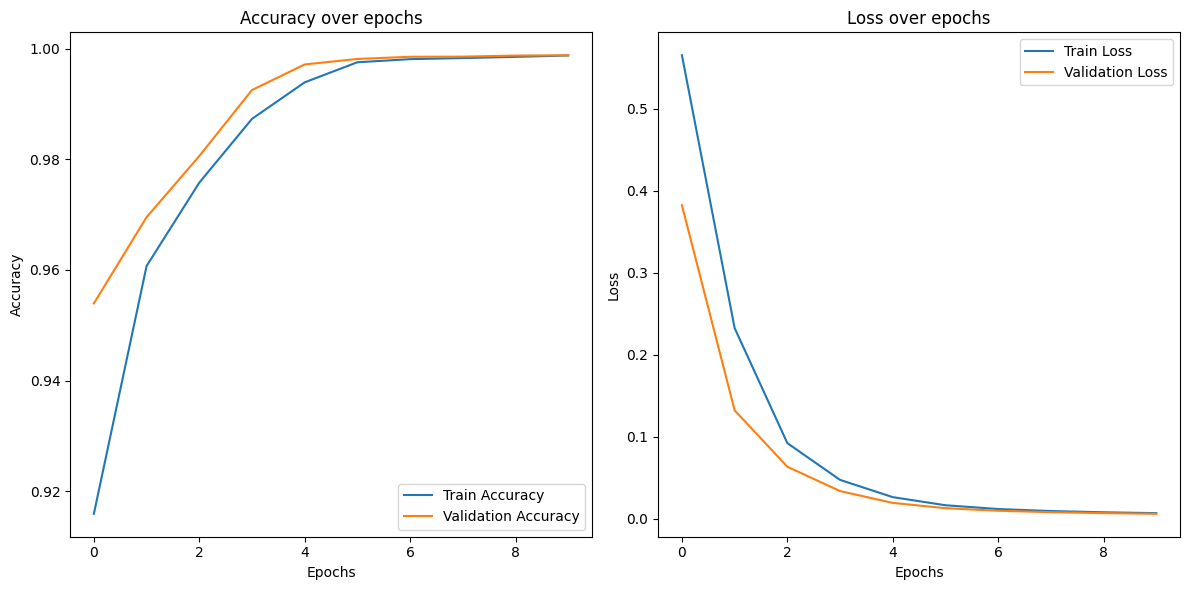

In [103]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_log.history['accuracy'], label='Train Accuracy')
plt.plot(history_log.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history_log.history['loss'], label='Train Loss')
plt.plot(history_log.history['val_loss'], label='Validation Loss')
plt.title('Loss over epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

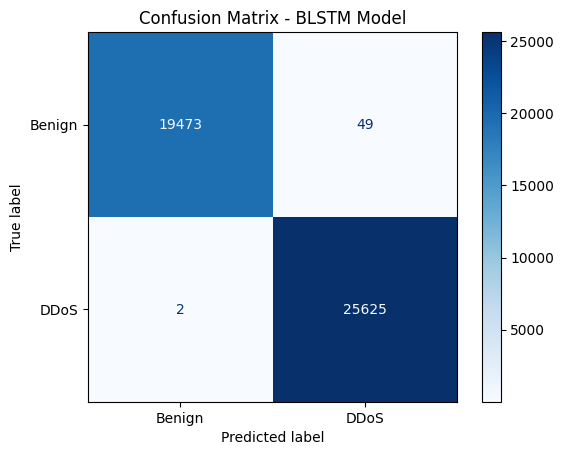

In [106]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming y_test (true labels) and y_pred (predicted labels) are already available
# y_pred should already be converted to binary (0 or 1) as in your code

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
labels = ['Benign', 'DDoS']

# Option 1: Simple plot using Matplotlib
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - BLSTM Model")
plt.show()




In [107]:
y_pred = model.predict(X_test)
y_pred

1411/1411 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step


array([[9.9744660e-01],
       [9.9988705e-01],
       [3.0245996e-04],
       ...,
       [9.9624205e-01],
       [9.9907368e-01],
       [9.9888009e-01]], dtype=float32)

In [ ]:
y_test

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0])

In [108]:
y_pred_flat = y_pred.flatten()
y_pred_flat

array([9.9744660e-01, 9.9988705e-01, 3.0245996e-04, ..., 9.9624205e-01,
       9.9907368e-01, 9.9888009e-01], dtype=float32)

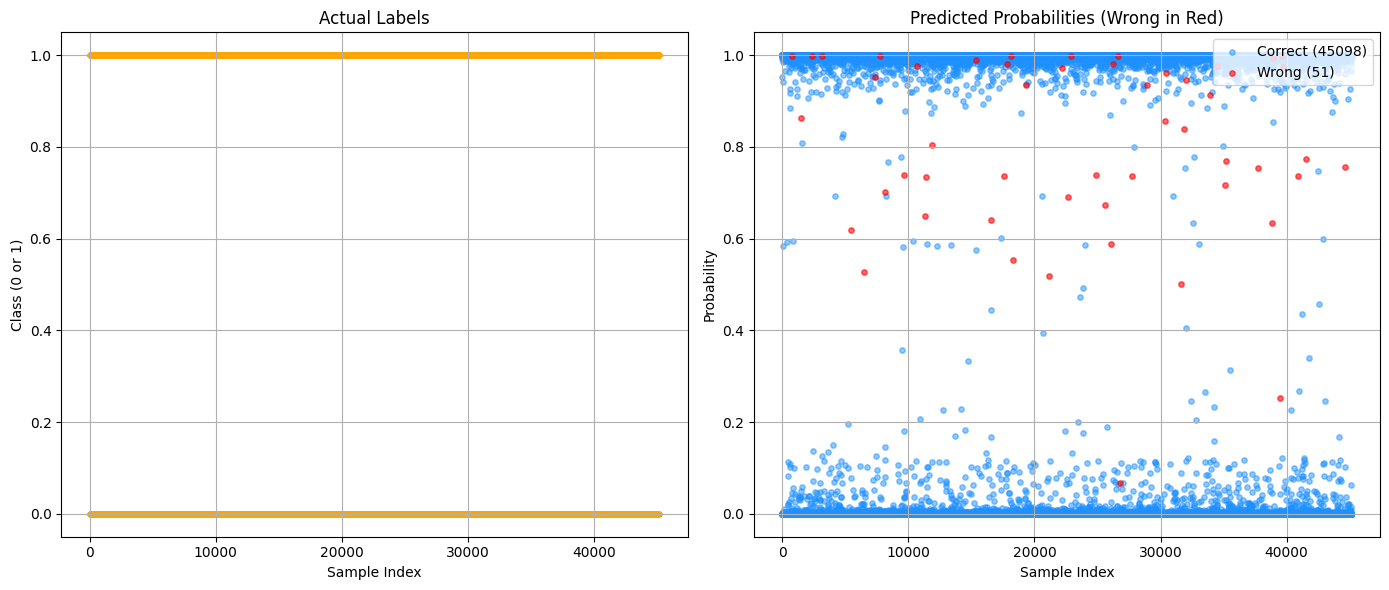

In [109]:
import numpy as np
import matplotlib.pyplot as plt

# Convert predicted probabilities to binary class labels
y_pred_labels = (y_pred_flat > 0.5).astype(int)

# Identify indices of correct and incorrect predictions
correct_idx = np.where(y_pred_labels == y_test)[0]
incorrect_idx = np.where(y_pred_labels != y_test)[0]

# Count correct and incorrect
correct_count = len(correct_idx)
incorrect_count = len(incorrect_idx)

# Plot
plt.figure(figsize=(14, 6))

# --- Left Plot: Actual Labels ---
plt.subplot(1, 2, 1)
plt.scatter(range(len(y_test)), y_test, color='orange', alpha=0.3, s=10)
plt.title('Actual Labels')
plt.xlabel('Sample Index')
plt.ylabel('Class (0 or 1)')
plt.grid(True)

# --- Right Plot: Predicted Probabilities ---
plt.subplot(1, 2, 2)
# Correct predictions: blue
plt.scatter(correct_idx, y_pred_flat[correct_idx], color='dodgerblue', alpha=0.5, s=15, label=f'Correct ({correct_count})')
# Wrong predictions: red
plt.scatter(incorrect_idx, y_pred_flat[incorrect_idx], color='red', alpha=0.6, s=15, label=f'Wrong ({incorrect_count})')

plt.title('Predicted Probabilities (Wrong in Red)')
plt.xlabel('Sample Index')
plt.ylabel('Probability')
plt.legend(loc='upper right')
plt.grid(True)

plt.tight_layout()
plt.show()

In [110]:
X_test[0]

array([[-0.6576335 ,  0.62979891,  0.01709162, -0.44544652, -0.41227771,
        -0.4135923 ,  0.00811028, -0.28567598, -0.1339806 , -0.7383266 ,
        -0.33119304, -0.28861802, -0.03655994, -0.33324511, -0.05455016,
        -0.29860588, -0.2066195 , -0.29407874,  0.        , -0.08251416,
        -0.13144581, -0.84446331,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        , -0.7029887 , -0.27988687, -0.49658553,
        -0.13937244,  0.05611272, -0.35585015, -0.23163392, -0.06151215,
        -0.28313719, -0.39107132]])

#custom Transformer Encoder neural network for binary classification

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

# Simulate dummy data or load your real data
# For example: 1000 samples, 5 time steps, 1 feature
X = np.random.rand(1000, 5, 1)
y = np.random.choice(['Normal', 'DDoS'], size=1000)

# Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Positional Encoding Layer (for transformer)
class PositionalEncoding(layers.Layer):
    def __init__(self, sequence_length, d_model):
        super(PositionalEncoding, self).__init__()
        pos = np.arange(sequence_length)[:, np.newaxis]
        i = np.arange(d_model)[np.newaxis, :]
        angle_rates = 1 / np.power(10000, (2 * (i // 2)) / np.float32(d_model))
        angle_rads = pos * angle_rates
        angle_rads[:, 0::2] = np.sin(angle_rads[:, 0::2])
        angle_rads[:, 1::2] = np.cos(angle_rads[:, 1::2])
        self.pos_encoding = tf.constant(angle_rads[np.newaxis, ...], dtype=tf.float32)

    def call(self, x):
        return x + self.pos_encoding[:, :tf.shape(x)[1], :]

# Transformer Encoder Block
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    x = layers.MultiHeadAttention(key_dim=head_size, num_heads=num_heads)(inputs, inputs)
    x = layers.Dropout(dropout)(x)
    x = layers.LayerNormalization(epsilon=1e-6)(x + inputs)

    x_ff = layers.Dense(ff_dim, activation="relu")(x)
    x_ff = layers.Dense(inputs.shape[-1])(x_ff)
    x = layers.Dropout(dropout)(x_ff)
    x = layers.LayerNormalization(epsilon=1e-6)(x + x_ff)
    return x

# Input
sequence_length = X_train.shape[1]
d_model = 32

inputs = layers.Input(shape=(sequence_length, 1))
x = layers.Dense(d_model)(inputs)  # Linear projection to d_model
x = PositionalEncoding(sequence_length, d_model)(x)

# Transformer Block(s)
x = transformer_encoder(x, head_size=32, num_heads=2, ff_dim=64, dropout=0.1)

# Global pooling and output
x = layers.GlobalAveragePooling1D()(x)
x = layers.Dense(64, activation="relu")(x)
x = layers.Dropout(0.1)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)

# Model
model = models.Model(inputs, outputs)
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
model.summary()

# Train
history = model.fit(X_train, y_train, validation_split=0.1, epochs=20, batch_size=32)

# Evaluate
y_pred = (model.predict(X_test) > 0.5).astype(int)
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))


Model: "functional_14"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_18      │ (None, 5, 1)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_40 (Dense)    │ (None, 5, 32)     │         64 │ input_layer_18[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ positional_encoding │ (None, 5, 32)     │          0 │ dense_40[0][0]    │
│ (PositionalEncodin… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 5, 32)     │      8,416 │ positional_encod… │
│ (MultiHeadAttentio… │                   │            │ positional_encod… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_59          │ (None, 5, 32)     │          0 │ multi_head_atten… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_8 (Add)         │ (None, 5, 32)     │          0 │ dropout_59[0][0], │
│                     │                   │            │ positional_encod… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 5, 32)     │         64 │ add_8[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_41 (Dense)    │ (None, 5, 64)     │      2,112 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_42 (Dense)    │ (None, 5, 32)     │      2,080 │ dense_41[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_60          │ (None, 5, 32)     │          0 │ dense_42[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_9 (Add)         │ (None, 5, 32)     │          0 │ dropout_60[0][0], │
│                     │                   │            │ dense_42[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 5, 32)     │         64 │ add_9[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 32)        │          0 │ layer_normalizat… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_43 (Dense)    │ (None, 64)        │      2,112 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_61          │ (None, 64)        │          0 │ dense_43[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_44 (Dense)    │ (None, 1)         │         65 │ dropout_61[0][0]  │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 14,977 (58.50 KB)

 Trainable params: 14,977 (58.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.4860 - loss: 0.7268 - val_accuracy: 0.5000 - val_loss: 0.7090
Epoch 2/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4821 - loss: 0.7124 - val_accuracy: 0.5000 - val_loss: 0.6965
Epoch 3/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.4926 - loss: 0.7113 - val_accuracy: 0.5000 - val_loss: 0.7005
Epoch 4/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5084 - loss: 0.6980 - val_accuracy: 0.5250 - val_loss: 0.6924
Epoch 5/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5272 - loss: 0.7010 - val_accuracy: 0.5000 - val_loss: 0.6938
Epoch 6/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5090 - loss: 0.6945 - val_accuracy: 0.5000 - val_loss: 0.6946
Epoch 7/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.4899 - loss: 0.7039 - val_accuracy: 0.5000 - val_loss: 0.6929
Epoch 8/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.4911 - loss: 0.6965 - val_accuracy: 0.5000 - 

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#1D CNN

Original X_train shape: (800, 5, 1)
Original X_test shape: (200, 5, 1)
Reshaped X_train shape: (800, 5, 1)
Reshaped X_test shape: (200, 5, 1)
Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.4931 - loss: 0.6924 - val_accuracy: 0.4850 - val_loss: 0.6935
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4716 - loss: 0.6951 - val_accuracy: 0.4850 - val_loss: 0.6937
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4779 - loss: 0.6938 - val_accuracy: 0.4950 - val_loss: 0.6940
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5076 - loss: 0.6935 - val_accuracy: 0.4950 - val_loss: 0.6939
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4917 - loss: 0.6951 - val_accuracy: 0.4950 - val_loss: 0.6938
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4982 - loss: 0.6947 - val_accuracy: 0.5000 - val_loss: 0.6937
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5579 - loss: 0.6915 - val_accuracy: 0

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Classification Report:
               precision    recall  f1-score   support

           0       0.49      1.00      0.66        99
           1       0.00      0.00      0.00       101

    accuracy                           0.49       200
   macro avg       0.25      0.50      0.33       200
weighted avg       0.25      0.49      0.33       200

Confusion Matrix:
 [[ 99   0]
 [101   0]]


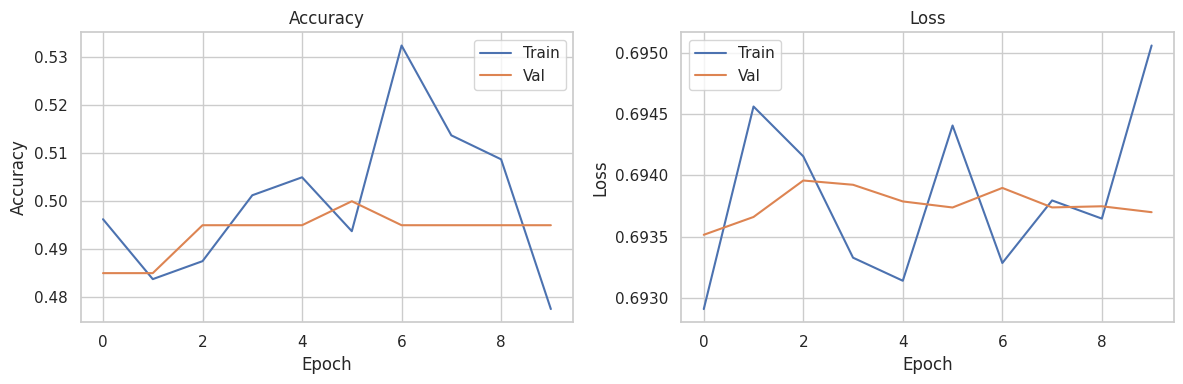

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix

# Inspect original shapes
print("Original X_train shape:", X_train.shape)
print("Original X_test shape:", X_test.shape)

# Fix X_test shape if needed
if len(X_test.shape) == 2:
    X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

print("Reshaped X_train shape:", X_train.shape)
print("Reshaped X_test shape:", X_test.shape)

# Define a CNN model suitable for very short time sequences
model = Sequential([
    Input(shape=(X_train.shape[1], X_train.shape[2])),
    Conv1D(filters=64, kernel_size=2, activation='relu', padding='same'),
    MaxPooling1D(pool_size=2, padding='same'),
    Dropout(0.2),

    Conv1D(filters=128, kernel_size=2, activation='relu', padding='same'),
    MaxPooling1D(pool_size=2, padding='same'),
    Dropout(0.2),

    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # For binary classification
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(X_test, y_test),
                    verbose=1)

# Evaluate
loss, accuracy = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {accuracy:.4f}")

# Predict
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Plot history
plt.figure(figsize=(12, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Val')
plt.title("Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Val')
plt.title("Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
# Step 1: Install Jupyter (if not already available)
!pip install nbconvert

# Step 2: Download the current notebook (if you don’t already have the .ipynb file)
# This only works if the notebook is already saved in your Google Drive or you upload it manually.

# Step 3: Convert the notebook to HTML
!jupyter nbconvert --to html DDOS.ipynb


[NbConvertApp] WARNING | pattern 'DDOS.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
    Execut

In [ ]:
from google.colab import files
files.download('DDOS.html')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>